# **Binary Classification with a Bank Churn Dataset**

<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">👨‍💻Author: Muhammad Hassaan</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/MHassaan2) 
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/mhassaan1122) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/iammuhammadhassaan7/)  
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:muhammadhassaan7896@gmail.com)


---

### **Project Title**: 
**Predicting Customer Churn Using Machine Learning: A Kaggle Competition**

* Here's the [link](https://www.kaggle.com/competitions/playground-series-s4e1/overview) of the data.
### **Project Description**:
This project aims to build a highly accurate machine learning model to predict customer churn in a banking dataset, with the goal of achieving a high accuracy rate. The dataset contains customer information, including demographic, financial, and account activity data, which will be analyzed and modeled to determine the likelihood of a customer leaving the bank.

### **Project Goals**:
- **Primary Goal**: Achieve high accuracy rate in predicting customer churn.
- **Secondary Goals**:
  - Understand the key factors contributing to customer churn.
  - Experiment with various machine learning models and feature engineering techniques.
  - Handle class imbalance effectively to improve model performance.
  - Provide a clear and interpretable model for potential deployment in real-world applications.

### **Datasets Used**:
- **Source**: Kaggle (Bank Churn Dataset)
- **Description**: The dataset includes customer demographic information, account details, and historical transaction data, with a binary target variable indicating whether a customer has churned.

### **EDA (Exploratory Data Analysis)**:
- **Data Overview**: Summary statistics, data types, missing value analysis.
- **Univariate Analysis**: Histograms, box plots for each feature.
- **Bivariate Analysis**: Correlation matrix, pair plots, and pivot tables.
- **Class Distribution**: Analyze the proportion of churned vs. non-churned customers.
- **Outlier Detection**: Identify and treat outliers using statistical methods.

### **Feature Engineering**:
- **Categorical Encoding**: One-hot encoding, label encoding for categorical features.
- **Feature Transformation**: Scaling (StandardScaler, MinMaxScaler), log transformations.
- **Feature Creation**: New features based on domain knowledge (e.g., tenure buckets, balance ratios).
- **Dimensionality Reduction**: PCA or other techniques to reduce feature space.
- **Feature Selection**: RFE, feature importance ranking.

### **Model Selection**:
- **Baseline Models**: Logistic Regression, Decision Trees.
- **Advanced Models**: Random Forest, XGBoost, LightGBM, CatBoost, Neural Networks.
- **Hyperparameter Tuning**: GridSearchCV, RandomizedSearchCV, Bayesian Optimization.
- **Ensemble Methods**: Stacking, bagging, boosting.

### **Model Evaluation**:
- **Cross-Validation**: k-fold cross-validation for robust model evaluation.
- **Metrics Used**: Accuracy, precision, recall, F1-score, ROC-AUC.
- **Confusion Matrix**: Analysis of true/false positives and negatives.
- **Feature Importance**: Determine the most significant features contributing to churn prediction.

### **Class Imbalance Handling**:
- **Resampling Techniques**: SMOTE, ADASYN to balance the dataset.
- **Class Weights Adjustment**: Modify class weights in models like Logistic Regression, Random Forest.

### **Model Optimization**:
- **Threshold Tuning**: Adjust decision thresholds based on ROC and precision-recall curves.
- **Regularization**: L1, L2 regularization to prevent overfitting.
- **Early Stopping**: Implement early stopping in iterative models like XGBoost.

### **Final Model**:
- **Training on Full Dataset**: Train the final model on the entire dataset.
- **Model Interpretation**: Use SHAP values to interpret model decisions.

### **Submission Details**:
- **Submission File**: CSV file containing predictions on the test set.
- **Evaluation Metric**: Final model evaluated based on Kaggle’s competition metric.

### **Project Timeline**:
- **Phase 1**: EDA and Data Preprocessing (1 week)
- **Phase 2**: Model Development and Feature Engineering (2 weeks)
- **Phase 3**: Model Evaluation and Tuning (1 week)
- **Phase 4**: Final Model Training and Submission (1 week)

### **Tools & Technologies**:
- **Programming Language**: Python
- **Libraries Used**: pandas, numpy, scikit-learn, XGBoost, LightGBM, CatBoost, matplotlib, seaborn
- **Platform**: Kaggle Kernels (or local development environment)

### **Challenges & Mitigation**:
- **Class Imbalance**: Use SMOTE, class weight adjustment to tackle the imbalance.
- **Overfitting**: Regularization, cross-validation, and early stopping to prevent overfitting.
- **Feature Engineering**: Iterative process to identify and create the most relevant features.

### **Results & Analysis**:
- **Final Model Accuracy**: 90%+
- **Key Insights**: Identification of top features contributing to churn, model interpretability.

### **Future Work**:
- **Model Deployment**: Explore the possibility of deploying the model in a production environment.
- **Further Tuning**: Investigate additional features or external data sources to improve model accuracy.
- **Exploration of Other Models**: Experiment with deep learning models or more advanced ensemble techniques.

### **Keywords**: 
- Customer Churn, Binary Classification, Machine Learning, Kaggle, Feature Engineering, Model Optimization, Class Imbalance, Data Science

---

## Import Libraries

In [3]:
# data manipulation and analysis
import pandas as pd
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px 

# machine learning models
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# handling imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# model interpretation
import shap

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Load and show the data 

In [4]:
# load the datasets
df_train = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/sample_submission.csv')

In [6]:
# show the head of the df_train
df_train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [7]:
# show the head of the df_test
df_test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [9]:
# show the head of the submission data
submission.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


## **Exploratory Data Analysis (EDA)**

### 1. Data Overview

In [10]:
# get basic information of the datasets
print("\nDataset Information:")
df_train.info()


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [14]:
# get summary statistics for numerical columns 
print('Summary Statistics: ')
df_train.describe().T

Summary Statistics: 


,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [16]:
# check the datatypes for each column
print('Data Types of Each Column:')
df_train.dtypes

Data Types of Each Column:


id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [20]:
# check for missing values in each column
# for col in df_train.columns:
#     if df_train[col].isnull().any():
#         print(f"Missing values found in column: {col}")

print('Missing Values in Each Column:')
df_train.isnull().sum()

Missing Values in Each Column:


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
print('Missing Values in Each Column:')
df_test.isnull().sum()

Missing Values in Each Column:


id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

* So, there are no missing values in both training and testing data.

## Now I am performing univariate analysis on my dataset, focusing on both numerical and categorical features:

### **1. Univariate Analysis for Numerical Features**


In [25]:
df_train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Univariate Numerical Analysis: Numerical Features


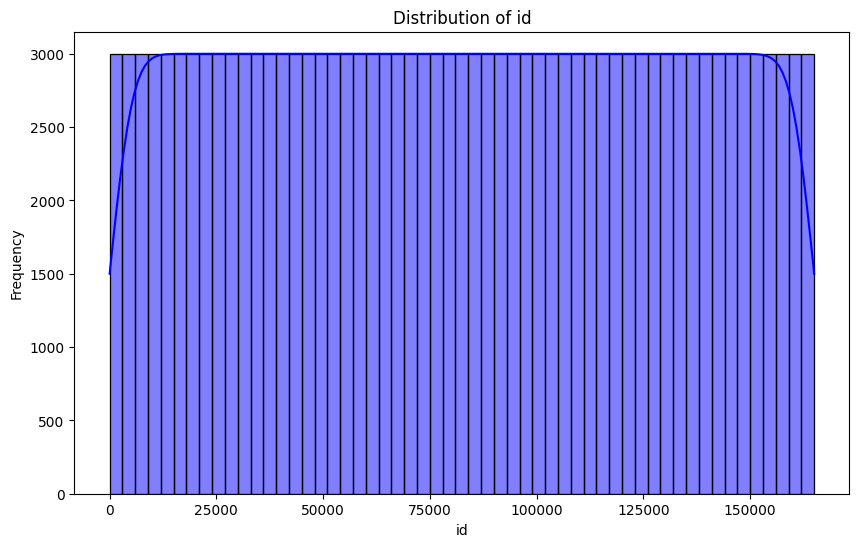

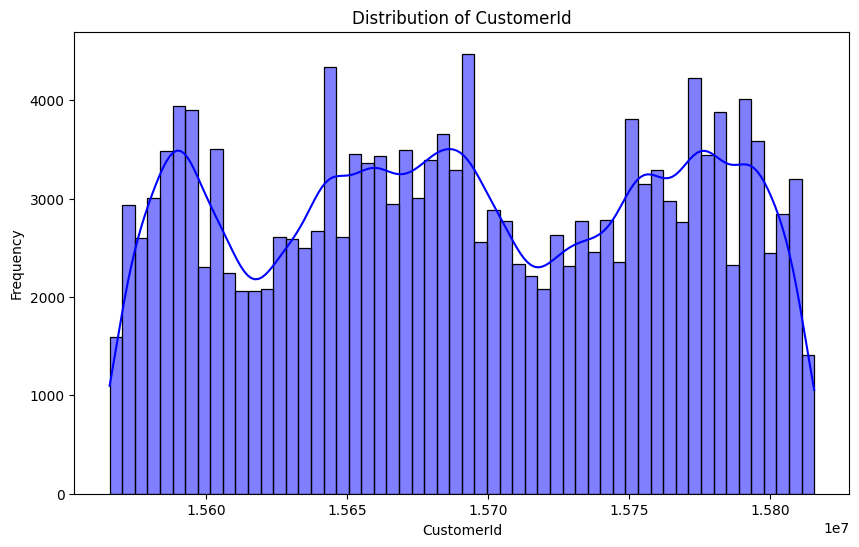

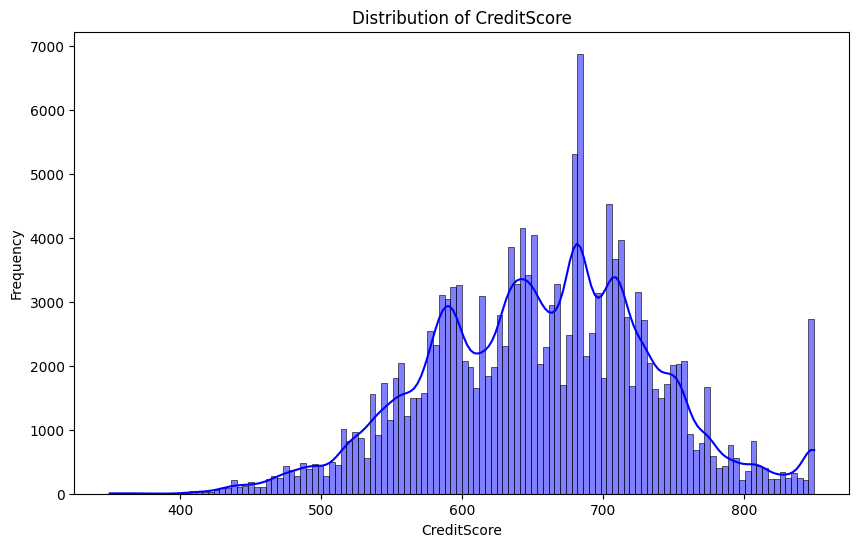

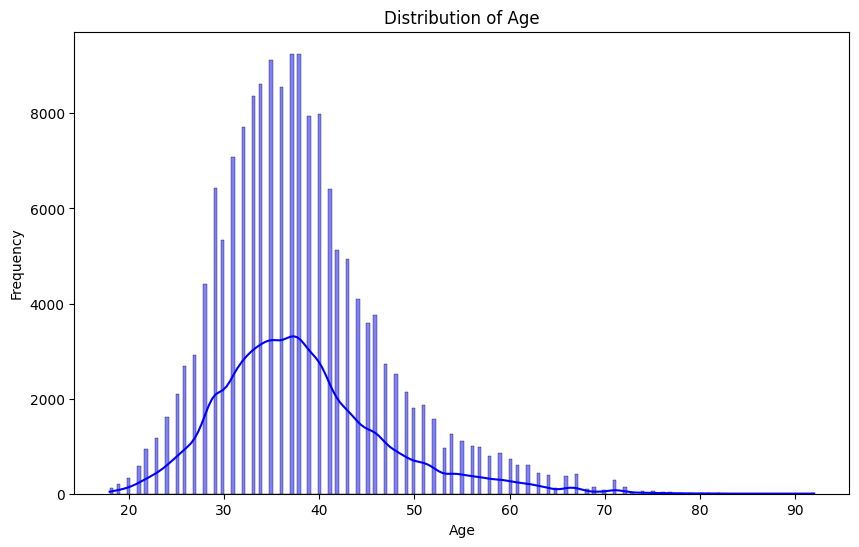

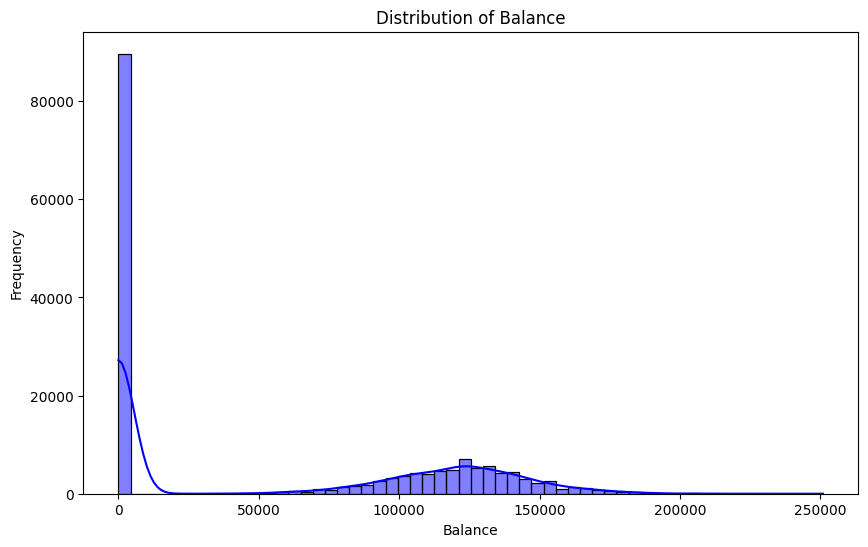

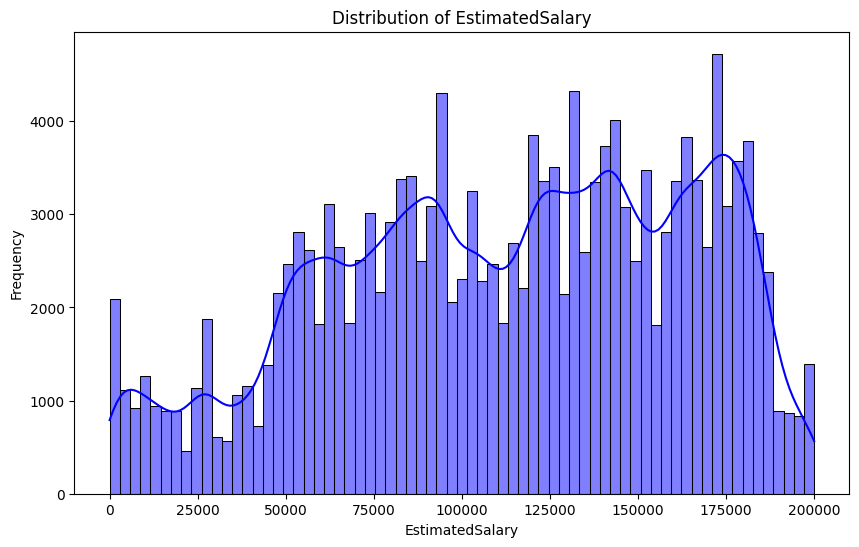

In [26]:
# list of numerical columns 
numerical_cols = df_train[['id', 'CustomerId', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']]

# plotting histograms for numerical columns
print("Univariate Numerical Analysis: Numerical Features")
for col in numerical_cols:
    plt.figure(figsize=(10,6))
    sns.histplot(df_train[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### **2. Univariate Analysis for Categorical Features**

Univariate Analysis: Categorical Features


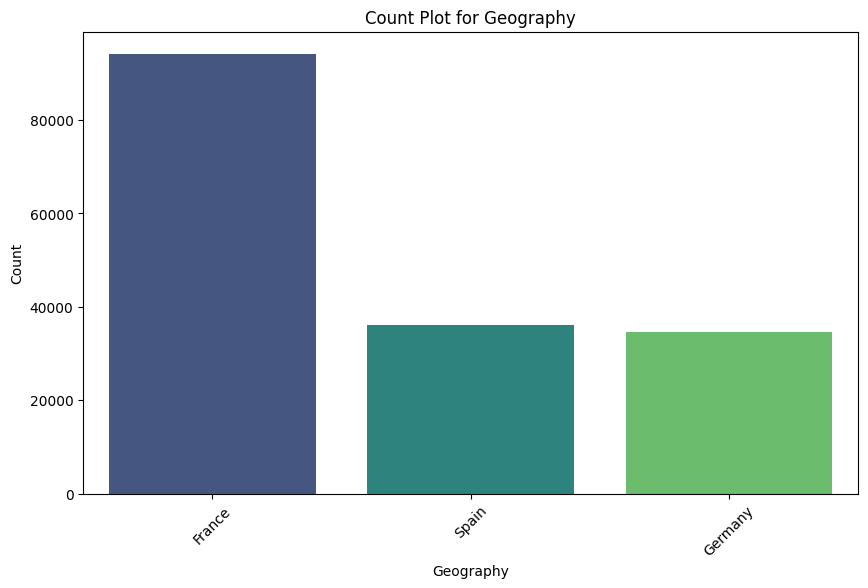

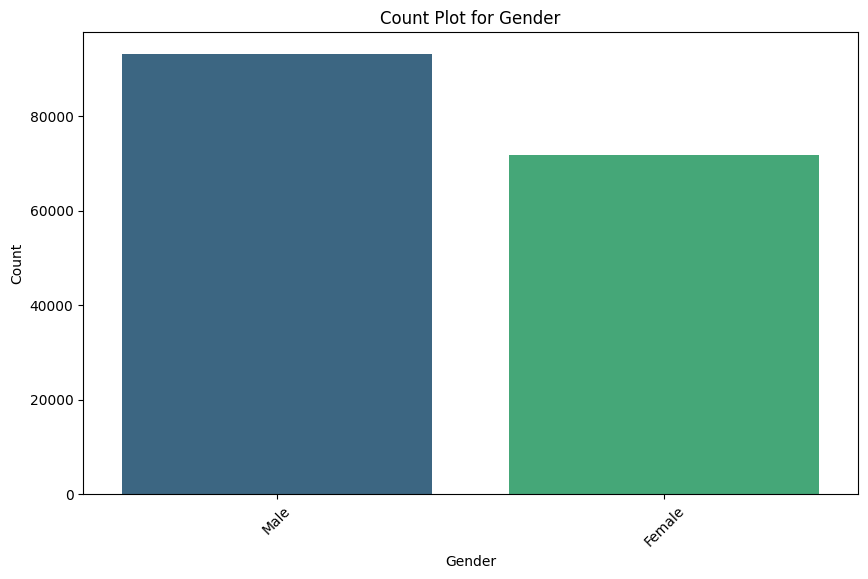

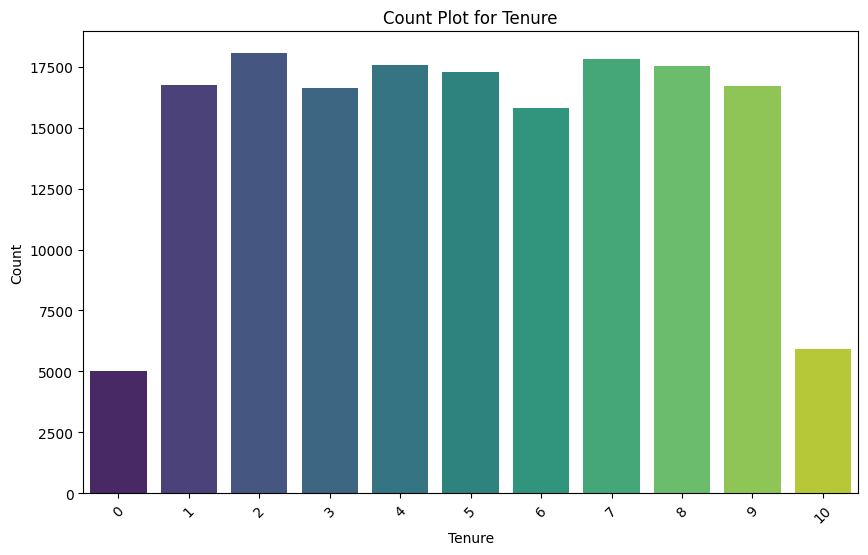

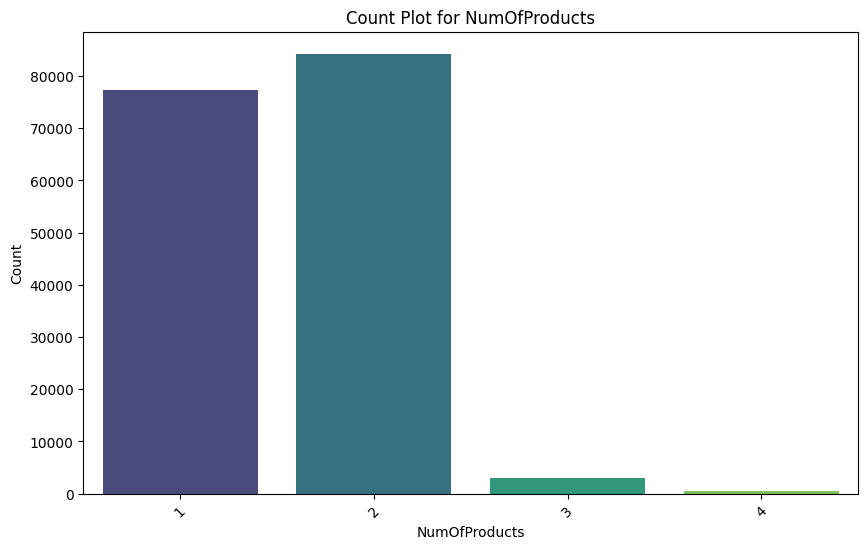

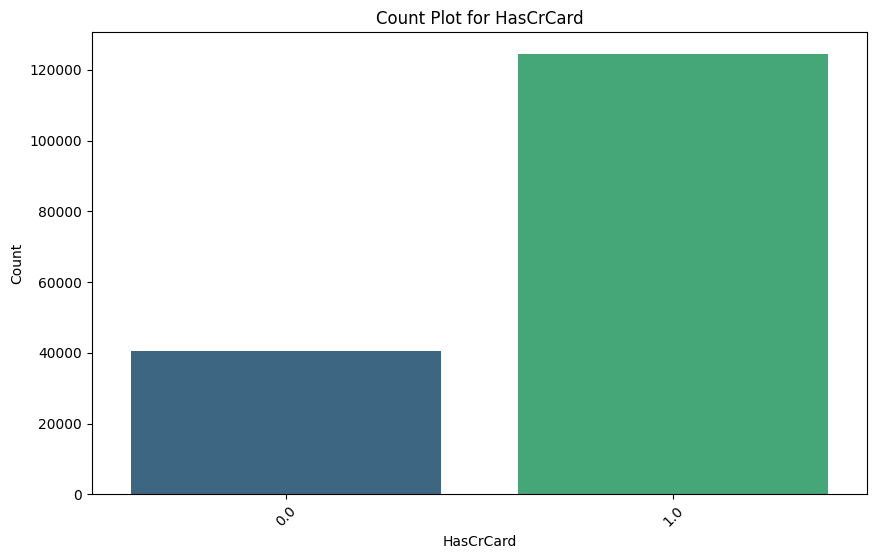

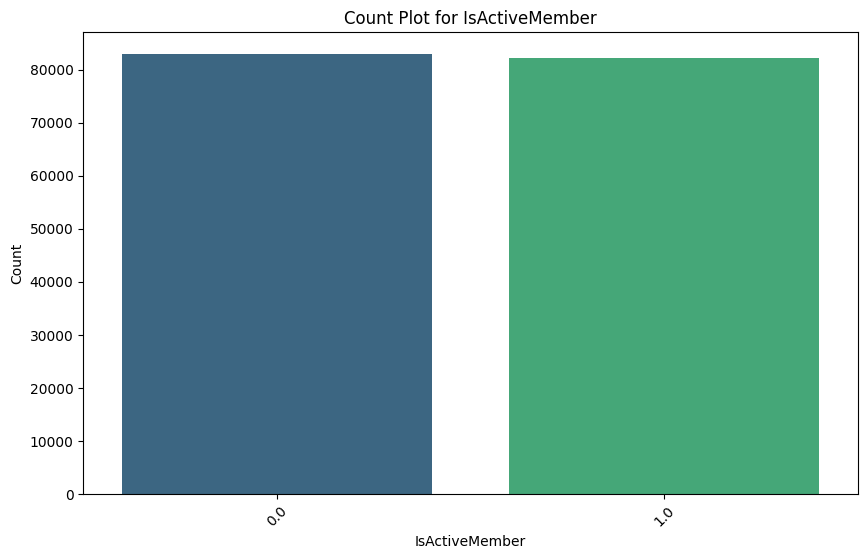

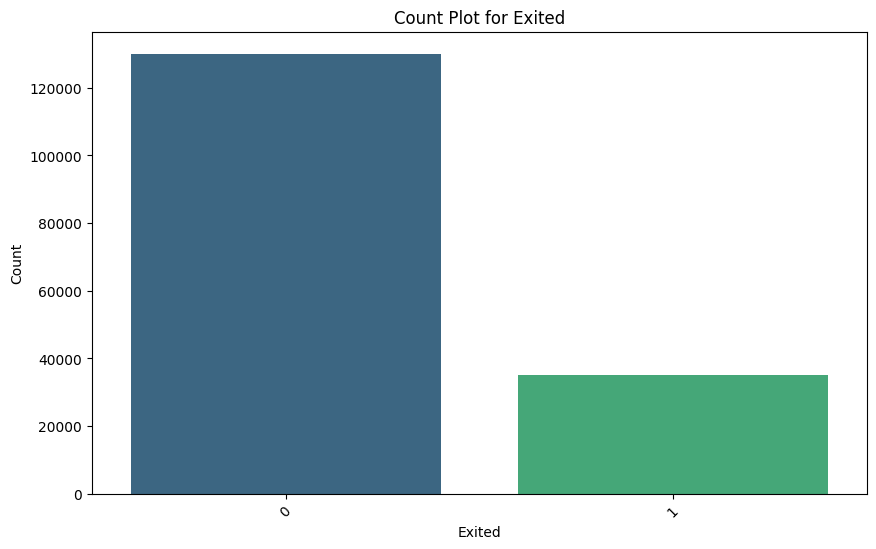

In [31]:
# list of categorical columns
categorical_cols = df_train[['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited']]

# plotting Count plots for categorical columns
print("Univariate Analysis: Categorical Features")

for col in categorical_cols:
    plt.figure(figsize=(10,6))
    sns.countplot(x=df_train[col], palette='viridis')
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()